In [34]:
#Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [35]:
#Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high =90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [36]:
#Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [37]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

610

In [38]:
#Import the datetime module from the datetime library.
from datetime import datetime
#Import the requests library and the weather_api_key
import requests
from config import weather_api_key

In [39]:
#Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [40]:
#Create an empty list to hold the weather data.
city_data = []

#Print the beginning of the logging.
print("Beginning Data Retrieval    ")
print("----------------------------")

#Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval    
----------------------------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | atasu
Processing Record 3 of Set 1 | san felipe
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 6 of Set 1 | mar del plata
Processing Record 7 of Set 1 | isilkul
Processing Record 8 of Set 1 | luderitz
Processing Record 9 of Set 1 | deputatskiy
Processing Record 10 of Set 1 | bredasdorp
Processing Record 11 of Set 1 | praia da vitoria
Processing Record 12 of Set 1 | novyy urengoy
Processing Record 13 of Set 1 | rovira
Processing Record 14 of Set 1 | ribeira grande
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | port alfred
Processing Record 17 of Set 1 | cockburn town
Processing Record 18 of Set 1 | cape town
Processing Record 19 of Set 1 | leshukonskoye
Processing Record 20 of Set 1 | saskylakh
Processing Record 21 of Set 1 | barrow
Processing Record 22 of S

Processing Record 36 of Set 4 | pisco
Processing Record 37 of Set 4 | bojnurd
Processing Record 38 of Set 4 | santa cruz de la palma
Processing Record 39 of Set 4 | guerrero negro
Processing Record 40 of Set 4 | barretos
Processing Record 41 of Set 4 | ponta do sol
Processing Record 42 of Set 4 | lake city
Processing Record 43 of Set 4 | georgetown
Processing Record 44 of Set 4 | bulri
Processing Record 45 of Set 4 | kodiak
Processing Record 46 of Set 4 | kurchum
Processing Record 47 of Set 4 | galiwinku
City not found. Skipping...
Processing Record 48 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 49 of Set 4 | waddan
Processing Record 50 of Set 4 | saint-pierre
Processing Record 1 of Set 5 | brewster
Processing Record 2 of Set 5 | armacao dos buzios
City not found. Skipping...
Processing Record 3 of Set 5 | laguna
Processing Record 4 of Set 5 | iralaya
Processing Record 5 of Set 5 | songea
Processing Record 6 of Set 5 | aksha
Processing Record 7 of Set 5 | dikso

Processing Record 25 of Set 8 | sao filipe
Processing Record 26 of Set 8 | sabang
Processing Record 27 of Set 8 | kenai
Processing Record 28 of Set 8 | leningradskiy
Processing Record 29 of Set 8 | west wendover
Processing Record 30 of Set 8 | alta floresta
Processing Record 31 of Set 8 | omboue
Processing Record 32 of Set 8 | shetpe
Processing Record 33 of Set 8 | ancud
Processing Record 34 of Set 8 | lashio
Processing Record 35 of Set 8 | adrar
Processing Record 36 of Set 8 | tres arroyos
Processing Record 37 of Set 8 | mokhsogollokh
Processing Record 38 of Set 8 | coffs harbour
Processing Record 39 of Set 8 | auki
Processing Record 40 of Set 8 | kiama
Processing Record 41 of Set 8 | gigmoto
Processing Record 42 of Set 8 | abha
Processing Record 43 of Set 8 | severo-kurilsk
Processing Record 44 of Set 8 | russell
Processing Record 45 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 46 of Set 8 | inirida
Processing Record 47 of Set 8 | santa rosa
Processing Record

Processing Record 16 of Set 12 | yataity del norte
Processing Record 17 of Set 12 | wanning
Processing Record 18 of Set 12 | odweyne
Processing Record 19 of Set 12 | trairi
Processing Record 20 of Set 12 | mushie
Processing Record 21 of Set 12 | chapais
Processing Record 22 of Set 12 | ormara
Processing Record 23 of Set 12 | beruni
City not found. Skipping...
Processing Record 24 of Set 12 | vinukonda
Processing Record 25 of Set 12 | yashan
Processing Record 26 of Set 12 | borogontsy
Processing Record 27 of Set 12 | jiayuguan
Processing Record 28 of Set 12 | sulphur
Processing Record 29 of Set 12 | gazanjyk
Processing Record 30 of Set 12 | porto belo
Processing Record 31 of Set 12 | fukue
Processing Record 32 of Set 12 | tumannyy
City not found. Skipping...
Processing Record 33 of Set 12 | tura
Processing Record 34 of Set 12 | senno
Processing Record 35 of Set 12 | hermiston
Processing Record 36 of Set 12 | yerofey pavlovich
Processing Record 37 of Set 12 | pacov
Processing Record 38 o

In [41]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.19,168.86,57.99,75,96,1.01,NZ,2020-08-20 01:58:42
1,Atasu,48.68,71.64,58.51,44,86,6.78,KZ,2020-08-20 01:58:42
2,San Felipe,10.34,-68.74,73.31,93,31,2.15,VE,2020-08-20 01:58:43
3,Jamestown,42.10,-79.24,60.80,63,1,3.36,US,2020-08-20 01:58:43
4,Mar Del Plata,-38.00,-57.56,39.99,64,40,4.70,AR,2020-08-20 01:53:47
5,Isilkul,54.91,71.27,49.51,78,100,17.60,RU,2020-08-20 01:58:44
6,Luderitz,-26.65,15.16,59.22,32,0,8.46,NA,2020-08-20 01:58:44
7,Deputatskiy,69.30,139.90,38.34,76,96,8.95,RU,2020-08-20 01:58:44
8,Bredasdorp,-34.53,20.04,45.00,93,73,9.28,ZA,2020-08-20 01:58:44
9,Praia Da Vitoria,38.73,-27.07,68.00,68,20,11.48,PT,2020-08-20 01:58:44


In [42]:
city_data_df = city_data_df[["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,2020-08-20 01:58:42,-46.19,168.86,57.99,75,96,1.01
1,Atasu,KZ,2020-08-20 01:58:42,48.68,71.64,58.51,44,86,6.78
2,San Felipe,VE,2020-08-20 01:58:43,10.34,-68.74,73.31,93,31,2.15
3,Jamestown,US,2020-08-20 01:58:43,42.10,-79.24,60.80,63,1,3.36
4,Mar Del Plata,AR,2020-08-20 01:53:47,-38.00,-57.56,39.99,64,40,4.70
...,...,...,...,...,...,...,...,...,...
558,Staryy Nadym,RU,2020-08-20 02:01:05,65.61,72.68,58.78,86,90,9.08
559,Turki,RU,2020-08-20 02:01:05,51.99,43.27,52.07,73,88,6.73
560,Sitka,US,2020-08-20 01:58:36,57.05,-135.33,66.20,63,75,4.70
561,Livingston,GB,2020-08-20 02:01:06,55.90,-3.52,64.40,93,75,10.29


In [43]:
#Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
#Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [44]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

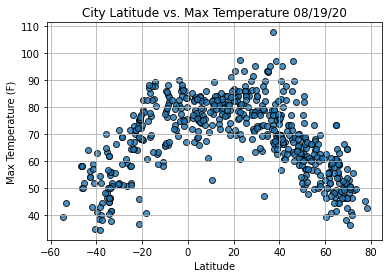

In [45]:
# Import the time module.
import time
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

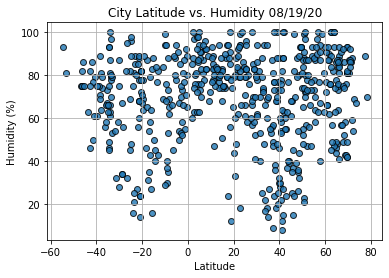

In [46]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

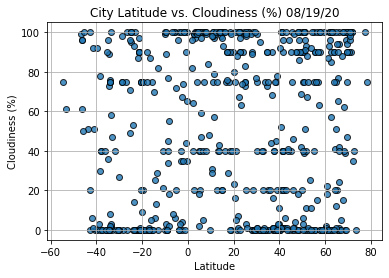

In [47]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

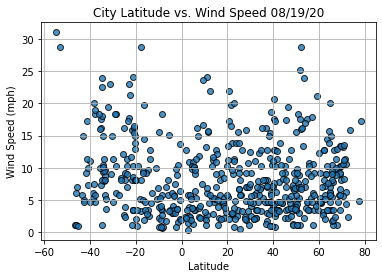

In [48]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [76]:
#Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [109]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    plt.title(title)
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [110]:
index13 = city_data_df.loc[13]
index13

City                      Rikitea
Country                        PF
Date          2020-08-20 01:58:45
Lat                        -23.12
Lng                       -134.97
Max Temp                    69.94
Humidity                       85
Cloudiness                    100
Wind Speed                  22.97
Name: 13, dtype: object

In [111]:
city_data_df["Lat"]>=0

0      False
1       True
2       True
3       True
4      False
       ...  
558     True
559     True
560     True
561     True
562     True
Name: Lat, Length: 563, dtype: bool

In [112]:
city_data_df.loc[(city_data_df["Lat"]>=0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Atasu,KZ,2020-08-20 01:58:42,48.68,71.64,58.51,44,86,6.78
2,San Felipe,VE,2020-08-20 01:58:43,10.34,-68.74,73.31,93,31,2.15
3,Jamestown,US,2020-08-20 01:58:43,42.10,-79.24,60.80,63,1,3.36
5,Isilkul,RU,2020-08-20 01:58:44,54.91,71.27,49.51,78,100,17.60
7,Deputatskiy,RU,2020-08-20 01:58:44,69.30,139.90,38.34,76,96,8.95
...,...,...,...,...,...,...,...,...,...
558,Staryy Nadym,RU,2020-08-20 02:01:05,65.61,72.68,58.78,86,90,9.08
559,Turki,RU,2020-08-20 02:01:05,51.99,43.27,52.07,73,88,6.73
560,Sitka,US,2020-08-20 01:58:36,57.05,-135.33,66.20,63,75,4.70
561,Livingston,GB,2020-08-20 02:01:06,55.90,-3.52,64.40,93,75,10.29


In [113]:
#Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>=0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"]<=0)]

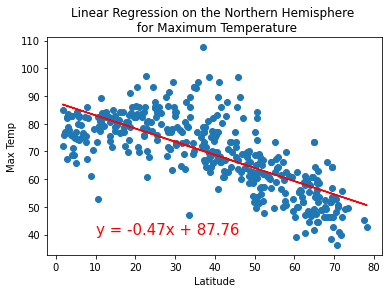

In [122]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

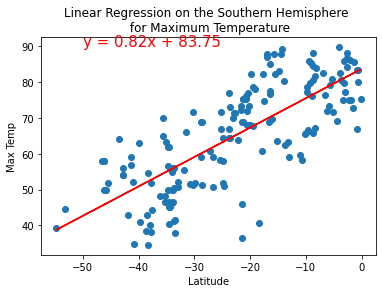

In [118]:
#linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
#Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp', (-50,90))

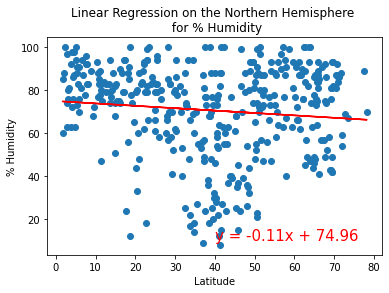

In [119]:
#Linear regression on the Northern Hemisphere.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity', (40,10))

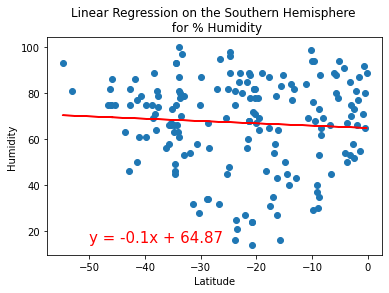

In [124]:
#Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
#Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Humidity', 'Humidity', (-50, 15))

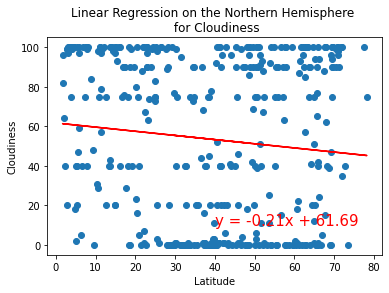

In [125]:
#Linear Regression on the Percent Cloudiness for the Northern Hemisphere.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Cloudiness', 'Cloudiness', (40,10))

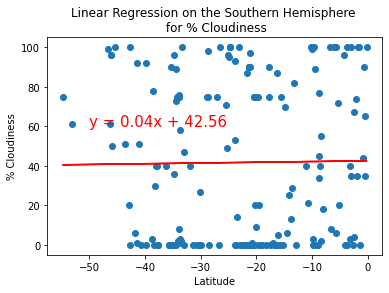

In [126]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

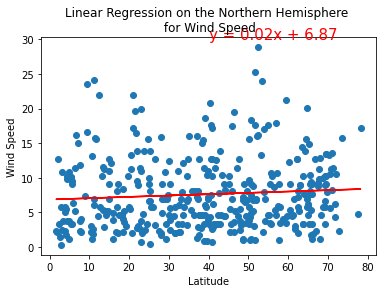

In [129]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,30))

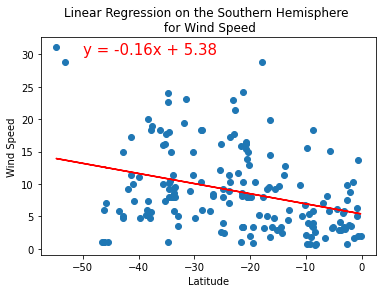

In [131]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,30))